<a href="https://colab.research.google.com/github/Nov05/Udactiy-Intel-Edge-AI-Scholarship/blob/master/notebooks/2_16_Exercise_Deploy_An_App_at_the_Edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-01-01

# Install Intel OpenVINO

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%%time
%%capture
## install tools
!sudo apt-get install -y pciutils cpio
!sudo apt autoremove
## downnload installation files
# !wget http://registrationcenter-download.intel.com/akdlm/irc_nas/16057/l_openvino_toolkit_p_2019.3.376.tgz
# path = "/content/l_openvino_toolkit_p_2019.3.376.tgz"
path = "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/l_openvino_toolkit_p_2019.3.376.tgz"
## install openvino
!tar xf "{path}" && \
    cd l_openvino_toolkit_p* && \
    ./install_openvino_dependencies.sh && \
    sed -i 's/decline/accept/g' silent.cfg && \
    ./install.sh --silent silent.cfg
## install dependencies
!/opt/intel/openvino/install_dependencies/install_openvino_dependencies.sh
## install prerequisites
!/opt/intel/openvino/deployment_tools/model_optimizer/install_prerequisites/install_prerequisites.sh

CPU times: user 873 ms, sys: 122 ms, total: 995 ms
Wall time: 2min 20s


# Run a demo

In [0]:
%%time
'''
CPU times: user 1.02 s, sys: 134 ms, total: 1.15 s
Wall time: 3min 12s
'''
## run demo
!source /opt/intel/openvino/bin/setupvars.sh && \
    /opt/intel/openvino/deployment_tools/demo/demo_squeezenet_download_convert_run.sh

# Udacity Exercise

[How to download pre-trained models](https://colab.research.google.com/drive/1Qm9AnHoUcN6s738bo7pmJxp10nmOq8O-?authuser=1#scrollTo=EWYR0k53ddik&line=6&uniqifier=1)   

In [14]:
## check models downloaded
!ls -ahl "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel"

total 12K
drwx------ 2 root root 4.0K Jan  2 00:18 human-pose-estimation-0001
drwx------ 2 root root 4.0K Jan  2 00:18 text-detection-0004
drwx------ 3 root root 4.0K Jan  2 00:18 vehicle-attributes-recognition-barrier-0039


In [0]:
%%capture
%cd /content
## download folder of github repo
!sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

/content/exercise/002_deploy_an_app_at_the_edge
(667, 1000, 3)


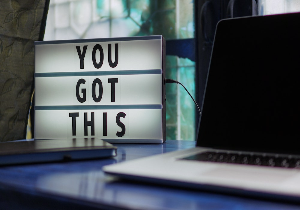

In [98]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

## display test image
%cd /content/exercise/002_deploy_an_app_at_the_edge
POSE_IMAGE = cv2.imread("../images/sign.jpg")
print(POSE_IMAGE.shape)
img = cv2.resize(POSE_IMAGE, (300, 210))
# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img) # cv2.imshow()

[setupvars.sh] OpenVINO environment initialized
Dimensions: (667, 1000, 3)


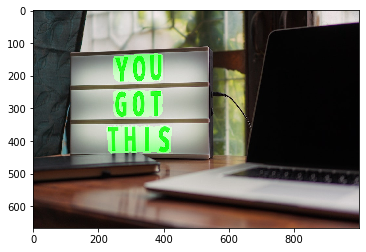

In [101]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh &&\
    python /content/exercise/002_deploy_an_app_at_the_edge/app.py \
    -i "../images/sign.jpg" \
    -t "TEXT" \
    -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/text-detection-0004/FP16/text-detection-0004.xml" \
    -c "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

## display result
import matplotlib.pyplot as plt
from PIL import Image
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/TEXT-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);

[setupvars.sh] OpenVINO environment initialized
Dimensions: (562, 1000, 3)


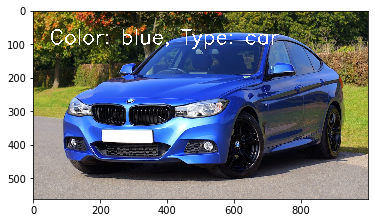

In [100]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh &&\
    python /content/exercise/002_deploy_an_app_at_the_edge/app.py \
    -i "../images/blue-car.jpg" \
    -t "CAR_META" \
    -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/vehicle-attributes-recognition-barrier-0039/INT8/vehicle-attributes-recognition-barrier-0039.xml" \
    -c "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

## display result
import matplotlib.pyplot as plt
from PIL import Image
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/CAR_META-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);

[setupvars.sh] OpenVINO environment initialized
Dimensions: (750, 1000, 3)


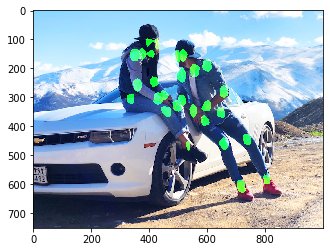

In [102]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh &&\
    python /content/exercise/002_deploy_an_app_at_the_edge/app.py \
    -i "../images/sitting-on-car.jpg" \
    -t "POSE" \
    -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/human-pose-estimation-0001/FP16/human-pose-estimation-0001.xml" \
    -c "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

## display result
import matplotlib.pyplot as plt
from PIL import Image
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/POSE-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);

In [89]:
%%writefile test.py
import cv2
import numpy as np
from handle_models import handle_output, preprocessing
from inference import Network
import os

CAR_COLORS = ["white", "gray", "yellow", "red", "green", "blue", "black"]
CAR_TYPES = ["car", "bus", "truck", "van"]

def create_output_image(model_type, image, output):
    '''
    Using the model type, input image, and processed output,
    creates an output image showing the result of inference.
    '''
    if model_type == "POSE":
        # Remove final part of output not used for heatmaps
        output = output[:-1]
        # Get only pose detections above 0.5 confidence, set to 255
        for c in range(len(output)):
            output[c] = np.where(output[c]>0.5, 255, 0)
        # Sum along the "class" axis
        output = np.sum(output, axis=0)
        # Get semantic mask
        pose_mask = get_mask(output)
        # Combine with original image
        image = image + pose_mask
        return image
    elif model_type == "TEXT":
        # Get only text detections above 0.5 confidence, set to 255
        output = np.where(output[1]>0.5, 255, 0)
        # Get semantic mask
        text_mask = get_mask(output)
        # Add the mask to the image
        image = image + text_mask
        return image
    elif model_type == "CAR_META":
        # Get the color and car type from their lists
        color = CAR_COLORS[output[0]]
        car_type = CAR_TYPES[output[1]]
        # Scale the output text by the image shape
        scaler = max(int(image.shape[0] / 1000), 1)
        # Write the text of color and type onto the image
        image = cv2.putText(image, 
            "Color: {}, Type: {}".format(color, car_type), 
            (50 * scaler, 100 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 
            2 * scaler, (255, 255, 255), 3 * scaler)
        return image
    else:
        print("Unknown model type, unable to create output image.")
        return image

argsm = "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/vehicle-attributes-recognition-barrier-0039/INT8/vehicle-attributes-recognition-barrier-0039.xml"
argsc = "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"
argst = "CAR_META"
argsd = "CPU"

# Create a Network for using the Inference Engine
inference_network = Network()
# Load the model in the network, and obtain its input shape
n, c, h, w = inference_network.load_model(argsm, argsd, argsc)
# Read the input image
path = "../images/blue-car.jpg"
image = cv2.imread(path)
### TODO: Preprocess the input image
preprocessed_image = preprocessing(image, h, w)
# Perform synchronous inference on the image
inference_network.sync_inference(preprocessed_image)
# Obtain the output of the inference request
output = inference_network.extract_output()
### TODO: Handle the output of the network, based on args.t
### Note: This will require using `handle_output` to get the correct
###       function, and then feeding the output to that function.
output_func = handle_output(argst)
processed_output = output_func(output, image.shape)
# Create an output image based on network
output_image = create_output_image(argst, image, processed_output)
# Create directory if not exists
path = "outputs"
if not os.path.exists(path):
    os.makedirs(path)
# Save down the resulting image
path = f"outputs/{argst}-output.png"
result = cv2.imwrite(path, output_image)
if not result: 
    raise Exception(f"cv2.imwrite(\"{path}\") failed")

Overwriting test.py


[setupvars.sh] OpenVINO environment initialized
Dimensions: (562, 1000, 3)


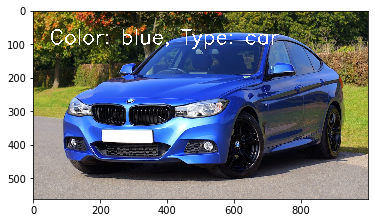

In [93]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh && python test.py
## display result
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/CAR_META-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);